# Introduction 

## Description 
This notebook contains an analysis of hidden trends between some basic information regarding a particular movie or show and the rating/popularity said movie or show receives on IMDb or TMDB ([link to dataset](https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies)). Moreover, this notebook uses various models to predict the popularity a movie or show receives on TMDB. 

Note that this notebook was created primarily to analyze the trends in a dataset, whatever information it may regard; essentially, this was intended to be a practice exercise. However, I found some appealing and unexpected patterns in this movie/show dataset that prompted me to release my work on Kaggle.

## Executive Summary 
This summary briefly captures the gist of the information discussed. It is recommended that you look through the whole notebook, or even conduct some research of your own, to discover all the patterns/trends that lay hidden. 

The analysis of this dataset verified some expected trends that one might expect. The thriller genre was the most popular, and shows from Korea, Japan, and China were highly successful in terms of popularity.
While confirming many patent trends, the analysis also sheds light on some unexpected nuances. For example, there was no connection between the score a movie received on TMDB and the popularity it received on the TMDB. The rating on IMDb and the popularity on TMDB exhibited a similar relationship as well. Countries such as Colombia and Poland were chosen quite frequently as locations for production and had more popularity as well. Additionally, shows for younger audiences, rated either `TV-G`, `TV-Y`, or `TV-Y7`, received high popularity ratings on TMDB. These shows scored higher (on average) on IMDb *and* TMDB.

While subtle, these trends may have some implications for the average movie/show director, especially one interested in optimizing popularity. To achieve such an ambitious goal, a director may want to create a thriller show for younger audiences with a large number of seasons.

# Exploration Objectives 



This section is primarily concerned with identifying trends between two or three features from the data set. Notice that many of the relationships are between a feature and a scoring metric. Primarily, the scoring metrics utilized will the rating on IMDB, the rating on TMDB, and the popularity on TMDB. One potential metric, namely the number of votes on IMDb, is not used.

In [2]:
# Load modules, data + initialize configuration
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

PALETTE = 'magma'
sns.set_theme(style="white")

In [3]:
plt.rcParams["font.family"] = "monospace"

In [4]:
df = pd.read_csv("titles.csv")

In [5]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


## Release Year vs Score 
This section describes the relationship between the release year and each of the scoring metrics. Moreover, I have grouped the release years into decades as this might yield interesting results.

In [8]:
# Get data where `imdb_votes` and `tmdb_score` are not null
df_cleaned = df[(~df['imdb_score'].isnull()) & (~df['tmdb_score'].isnull())]

df_1 = df_cleaned.copy()

# Group the release year by decade
def get_decade(val):
  return int(str(val)[0:-1] + "0")

df_1['decade'] = df_1['release_year'].map(get_decade)
df_1['decade'].value_counts()

2010    3046
2020    1442
2000     355
1990     126
1980      48
1970      21
1960      11
1950       6
Name: decade, dtype: int64

In [9]:
# Make bar plot of `decade` vs `score`
decade_score_relations = df_1.groupby('decade').aggregate({"imdb_score": "mean", "tmdb_score": "mean"})

<AxesSubplot:xlabel='decade', ylabel='imdb_score'>

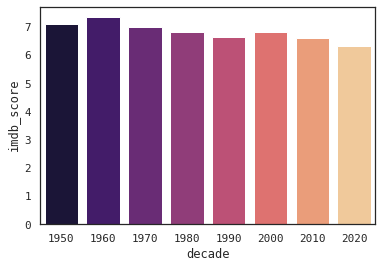

In [10]:
sns.barplot(x=decade_score_relations.index, y=decade_score_relations["imdb_score"], palette=PALETTE)

[Text(0.5, 0, 'Decade'),
 Text(0, 0.5, 'Score (IMDB)'),
 Text(0.5, 1.0, 'Decade vs Score (IMDB)')]

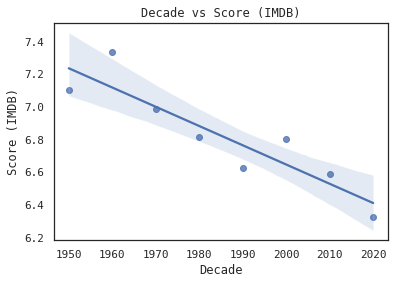

In [11]:
sns.regplot(x=decade_score_relations.index, y=decade_score_relations['imdb_score']).set(xlabel='Decade', ylabel='Score (IMDB)', title='Decade vs Score (IMDB)')

There seems to be an incredibly minute downward trend in the IMDB scores of each decade.

Note: the values plotted for each decade are the **means** of the `imdb_score` values for that decade.

Consider the following plots, which do not group by decade; rather, it uses the original year value.

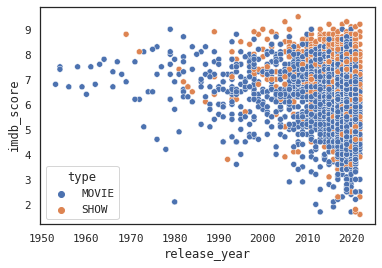

<AxesSubplot:xlabel='release_year', ylabel='imdb_score'>

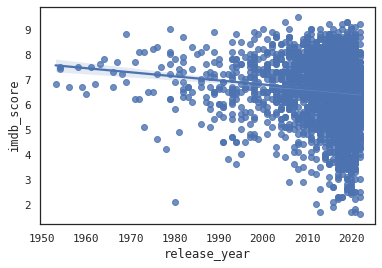

In [13]:
sns.scatterplot(x=df_1['release_year'], y=df_1['imdb_score'], hue=df_1['type'])
plt.show()
sns.regplot(x=df_1['release_year'], y=df_1['imdb_score'])

Although this plot is incredibly messy, the regression line still has a visibly negative slope. The reason for the downward trend in IMDB scores is hard to formulate, but there is some plausible reasoning.

One possible explanation is based on the technology available at that time. Early films did not have the advanced video editors, CGI, or the postprocessing effects that films of today so eagerly indulge. Thus, early directors would need to create an extraordinarily intriguing plot. Yes, directors of today do place an emphasis on plot; however, they have technology that can adequately make up for a bad plot for the average viewer. 

Nevertheless, this is only the trend for IMDb; the complete picture may suggest something different.

In [ ]:
# Plot relationship between `decade` and `tmdb_score`, once again using the average values per decade
sns.regplot(x=decade_score_relations.index, y=decade_score_relations['tmdb_score'], degree=2)

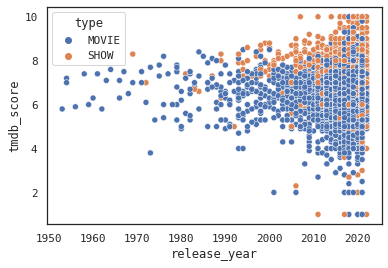

<AxesSubplot:xlabel='release_year', ylabel='tmdb_score'>

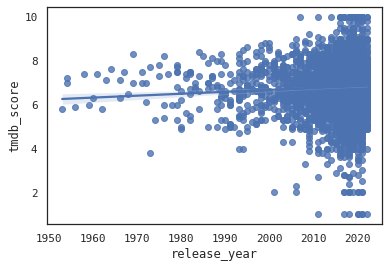

In [14]:
# Plot relationship between `release year` and `tmdb_score`
sns.scatterplot(x=df_1['release_year'], y=df_1['tmdb_score'], hue=df_1['type'])
plt.show()
sns.regplot(x=df_1['release_year'], y=df_1['tmdb_score'])

Interestingly enough, the `tmdb_score` values increase as time progresses.

This stark difference can then be attributed to either the ages of the users at IMDb or TMDB. Younger people tend to prefer today's movies while older folks may prefer movies from the '90s, '80s', or even the '70s.

There is one final metric that we have not looked at, namely the popularity on TMDB.

In [14]:
popularity_info = df_1.groupby('decade').aggregate({"tmdb_popularity": "mean"})

[Text(0.5, 0, 'Decade'),
 Text(0, 0.5, 'Popularity (TMDB)'),
 Text(0.5, 1.0, 'Decade vs Popularity (TMDB)')]

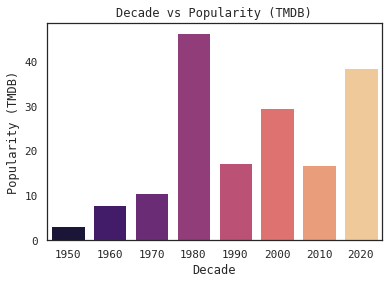

In [15]:
sns.barplot(x=popularity_info.index, y=popularity_info['tmdb_popularity'], palette=PALETTE).set(xlabel="Decade", ylabel="Popularity (TMDB)", title="Decade vs Popularity (TMDB)")

There is a slight upward trend in the popularity of movies. This suggests that, as time progresses, the movies (on average) will receive higher popularity scores.

The '80s had the movies with the highest average TMDB popularity. The next cell prints some of the movies, see if you recognize these titles.

In [16]:
df_1[df_1['decade'] == 1980].sort_values(by='tmdb_popularity', ascending=False)['title'].head(10)

64             Wheel of Fortune
47                     Seinfeld
46                      Top Gun
54    A Nightmare on Elm Street
57             Thomas & Friends
55                 Knight Rider
8               The Blue Lagoon
52            Full Metal Jacket
59                 Pet Sematary
66                  Fireman Sam
Name: title, dtype: object

Moreover, here are the titles with the highest TMDB popularity

In [17]:
df.sort_values(by='tmdb_popularity', ascending=False)['title'].head(10)

4869             365 Days: This Day
4875               The Marked Heart
64                 Wheel of Fortune
4988    Yaksha: Ruthless Operations
247                  Grey's Anatomy
916                  Peaky Blinders
4865                     Black Crab
4832                   Heartstopper
4836               The Adam Project
5046           Fistful of Vengeance
Name: title, dtype: object

### Conclusion 
As time progresses, the ratings of movies and shows on IMDb and TMDB, when averaged, will roughly remain the same. The popularity, on the other hand, has shown to be especially high for certain periods, yet it nonetheless continues a slight upward trend.

## Age Certification vs Score 

This next section is about the trend that various different age certifications (e.g., `TV-G`, `TV-14`, `R`, `PG-13`, etc.) exhibit with rating and popularity.

In [5]:
# Count the number of null values in the dataset
df['age_certification'].isnull().sum()

2610

In [19]:
# Fill null values with mode
df['age_certification'].fillna(df['age_certification'].mode()[0], inplace=True)

In [20]:
df_2 = df[(~df['imdb_score'].isnull()) & (~df['tmdb_score'].isnull())]

In [21]:
age_score = df_2.groupby("age_certification").aggregate({"imdb_score": "mean", "tmdb_score": "mean", "tmdb_popularity": "mean"})

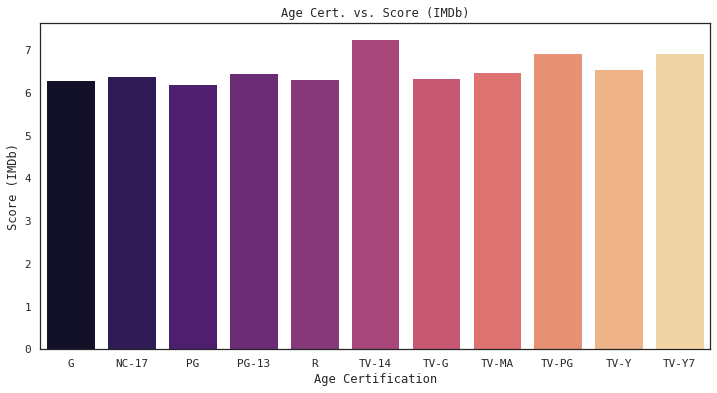

[Text(0.5, 0, 'Age Certification'),
 Text(0, 0.5, 'Score (TMDB)'),
 Text(0.5, 1.0, 'Age Cert. vs Score (TMDB)')]

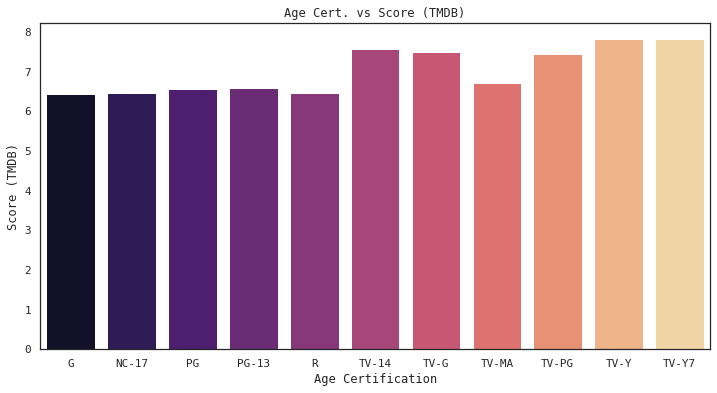

In [22]:
# Visualize IMDb/TMDB scores
plt.figure(figsize=(12, 6))
sns.barplot(x=age_score.index, y=age_score['imdb_score'], palette=PALETTE).set(xlabel="Age Certification", ylabel="Score (IMDb)", title="Age Cert. vs. Score (IMDb)")
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x=age_score.index, y=age_score['tmdb_score'], palette=PALETTE).set(xlabel="Age Certification", ylabel="Score (TMDB)", title="Age Cert. vs Score (TMDB)")

The distribution of average scores for each certification is fairly uniform, something that I was not expecting.

[Text(0.5, 0, 'Age Certification'),
 Text(0, 0.5, 'TMDB Popularity'),
 Text(0.5, 1.0, 'Age Cert. vs. Popularity (sorted)')]

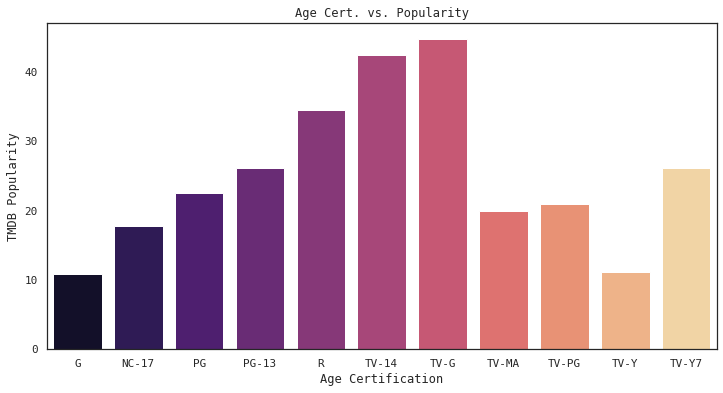

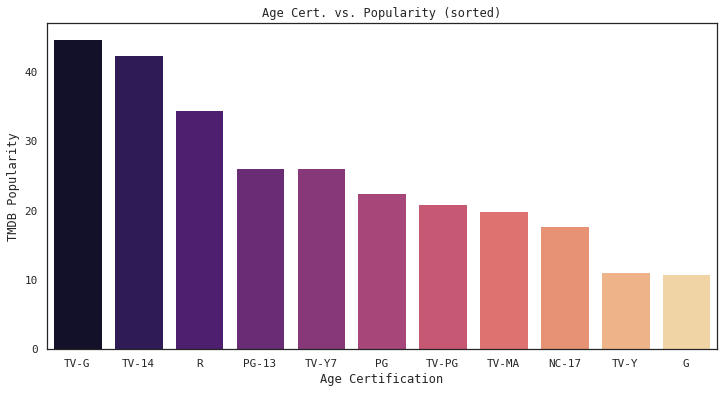

In [23]:
# Visualize popularities of each age certification
plt.figure(figsize=(12, 6))
sns.barplot(x=age_score.index, y=age_score['tmdb_popularity'], palette=PALETTE).set(xlabel='Age Certification', ylabel='TMDB Popularity', title='Age Cert. vs. Popularity')
plt.figure(figsize=(12, 6))
cert_sorted_pop = age_score.sort_values(by='tmdb_popularity', ascending=False)
sns.barplot(x=cert_sorted_pop.index, y=cert_sorted_pop['tmdb_popularity'], palette=PALETTE).set(xlabel='Age Certification', ylabel='TMDB Popularity', title='Age Cert. vs. Popularity (sorted)')

Interestingly enough, `TV-G` is the most popular age certification among the shows and `R` is the most popular age certification among the movies.

To see how much variation and nuance there is within a particular category, we can plot a histogram.

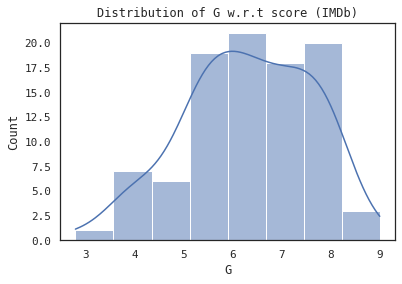

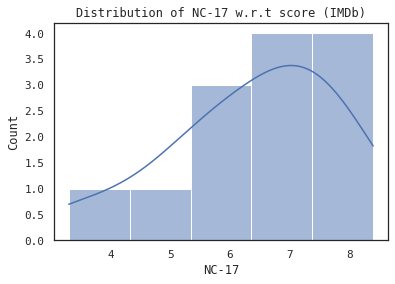

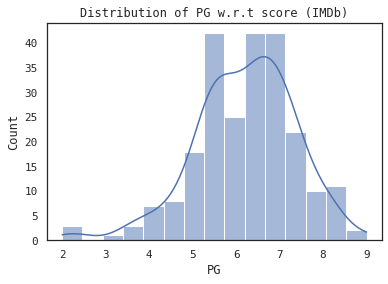

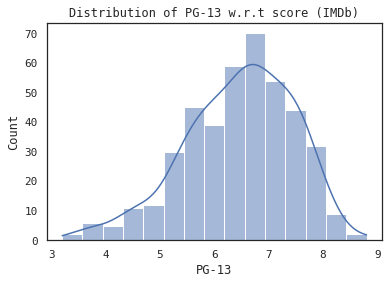

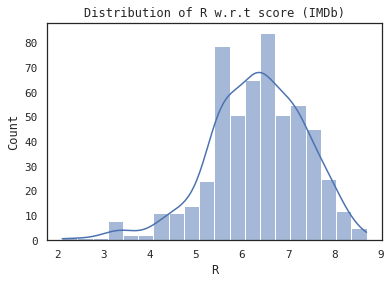

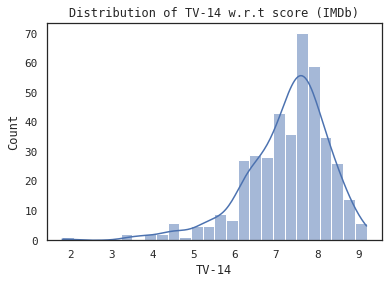

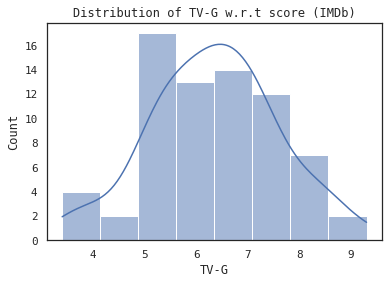

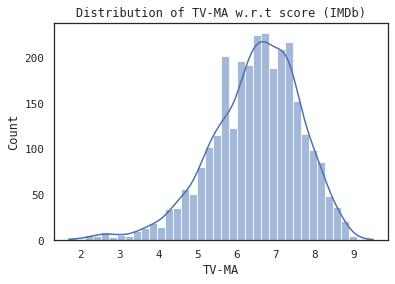

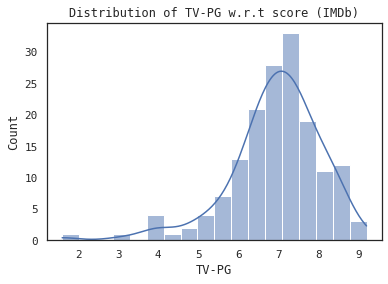

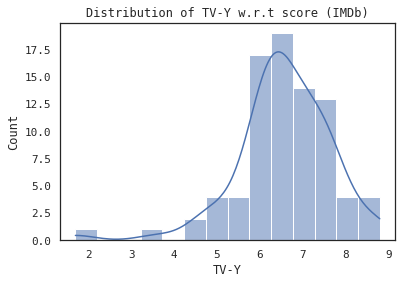

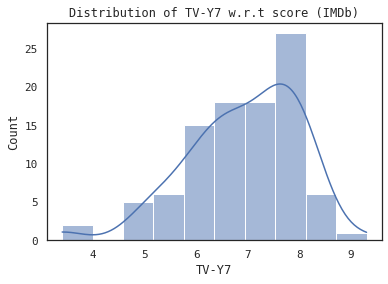

In [25]:
certifications = ['G', 'NC-17', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7']
for i in certifications:
  cert_values = df_2[df_2['age_certification'] == i]

  sns.histplot(cert_values['imdb_score'], kde=True).set(xlabel=i, title=f"Distribution of {i} w.r.t score (IMDb)")
  plt.show()

Although some are skewed slightly, the distributions within each certification are mostly normal.

### Conclusion 
The age certification did not seem to affect rating as one might expect it would have; the distribution was quite uniform. Moreover, within each certification, the distribution of scores was normal. The intriguing part of this mini-exploration was the surprising popularity of `TV-G` shows on TMDB. These are rated highly likely due to their ability to keep young children distracted while parents tend to important matters. Additionally, some shows catered towards kids include subtle adult jokes. 

## Genre vs. Score 

Next, we will explore how the genre of a movie can impact the score it receives on IMDb or TMDB.

Unfortunately, the organization of the data makes the `genre` column somewhat difficult to work with. Instead of simply one value of genre, we are given a list of genres, which is then transformed into a string.

Before we attempt to clean/parse the column, however, let us take a peek at some of the values that constitute this column.

In [16]:
df['genres'].value_counts()

['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: genres, Length: 1626, dtype: int64

Uh-oh. The `value_counts` method usually returns a nice `pd.Series` that has each value and its respective count. Due to the structure of the data, the method cannot parse the values in the most fitting manner. So, we must do the parsing ourselves.

In [6]:
# Parse genre column
genres = {}

def get_genres(row):
  parsed = (str(row)[1:-1]).split(",")

  for i in range(len(parsed)):
    parsed[i] = parsed[i].strip()
    parsed[i] = parsed[i][1:-1]

  for i in parsed:
    if i not in genres.keys():
      genres[i] = 0
      continue
    genres[i] += 1

  return row

df['genres'] = df['genres'].map(get_genres)
genres

{'documentation': 909,
 'crime': 890,
 'drama': 2900,
 'comedy': 2268,
 'fantasy': 630,
 'horror': 379,
 'european': 459,
 'thriller': 1177,
 'action': 1052,
 'music': 237,
 'romance': 957,
 'family': 621,
 'western': 43,
 'war': 148,
 'animation': 664,
 'history': 232,
 'scifi': 586,
 'reality': 222,
 'sport': 165,
 '': 67}

Now we get a glimpse of the data.

Note: the `''` corresponds to no genre.

We will now modify the `get_genres` function to transform the original columns. We will only use the first element of each value in the `genres` column.

In [19]:
def transform_genres(row):
  parsed = (str(row)[1:-1]).split(",")

  for i in range(len(parsed)):
    parsed[i] = parsed[i].strip()[1:-1]

  for i in parsed:
    if i not in genres.keys():
      genres[i] = 0
      continue
    genres[i] += 1

  return parsed[0] if parsed[0] != '' else 'none'

In [20]:
# Perform the transformation
df['genres_transformed'] = df['genres'].map(transform_genres)
df['genres_transformed'].value_counts()

drama            1432
comedy           1310
documentation     588
thriller          442
action            292
scifi             289
romance           265
crime             254
animation         232
reality           176
fantasy           143
horror            121
none               68
family             66
music              50
war                43
western            22
history             9
sport               4
Name: genres_transformed, dtype: int64

Now we get a clean list of all the genres.

Before we observe the relationship between the genre and the score, let us visualize the distribution of genres.

<AxesSubplot:xlabel='genres_transformed', ylabel='Count'>

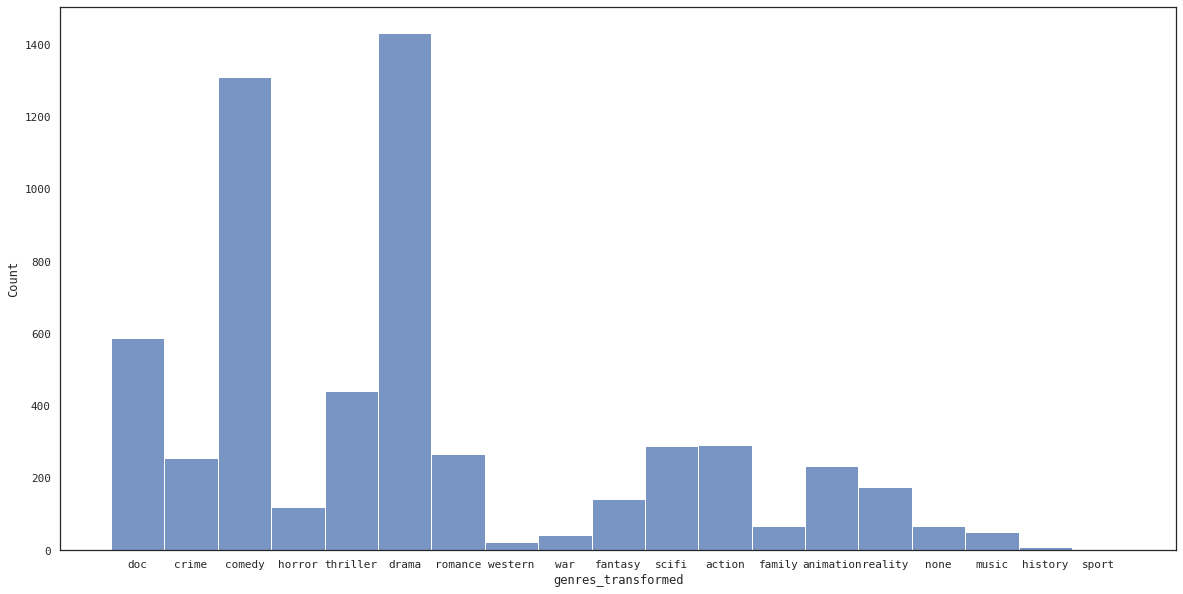

In [21]:
df['genres_transformed'].replace(to_replace='documentation', value='doc', inplace=True)
plt.figure(figsize=(20,10))
sns.histplot(df['genres_transformed'])

Next, we will visualize the relationship between a genre and the average score movies of that genre received.

In [25]:
df_3 = df[(~df['imdb_score'].isnull()) & (~df['tmdb_score'].isnull())]
df_3.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genres_transformed
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,crime
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,comedy
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8,comedy
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,horror
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3,comedy


In [26]:
genre_vs_score = df_3.groupby("genres_transformed").aggregate({"imdb_score": "mean", "tmdb_score": "mean", "tmdb_popularity": "mean"})
genre_vs_score.head()

,imdb_score,tmdb_score,tmdb_popularity
genres_transformed,,,
action,6.524906,7.027170,45.798860
animation,6.561350,7.222086,17.362252
comedy,6.357191,6.604399,15.003196
crime,6.729412,6.887395,24.526845
doc,7.088981,7.126195,8.122212


Note: I included the `tmdb_popularity` column in this grouping as it prevents us from having to include it at a later point.

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'Score (IMDb)'),
 Text(0.5, 1.0, 'Genre vs. Score (IMDb)')]

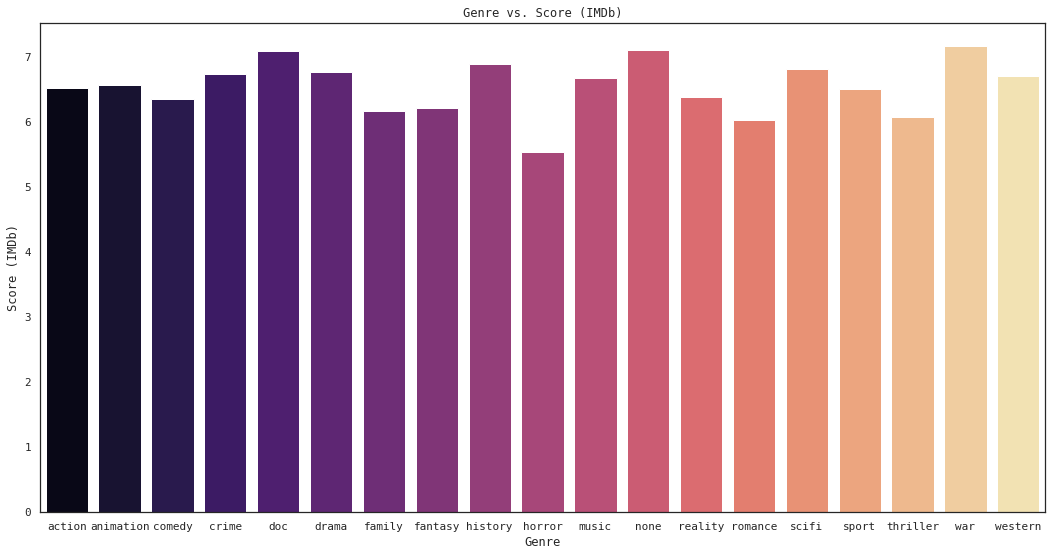

In [27]:
plt.figure(figsize=(18,9))
sns.barplot(x=genre_vs_score.index, y=genre_vs_score['imdb_score'], palette=PALETTE).set(xlabel="Genre", ylabel="Score (IMDb)", title="Genre vs. Score (IMDb)")

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'Score (TMDB)'),
 Text(0.5, 1.0, 'Genre vs. Score (TMDB)')]

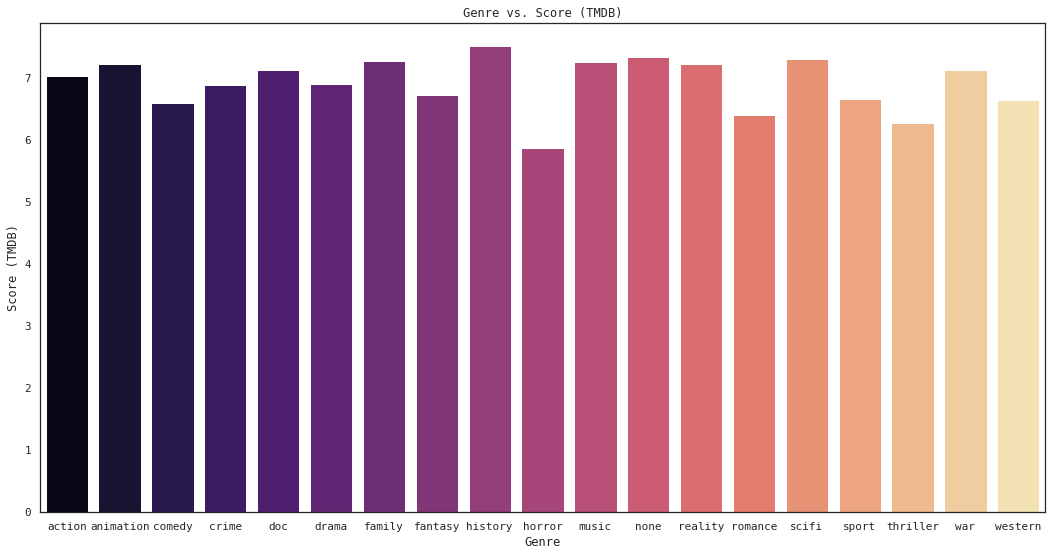

In [29]:
plt.figure(figsize=(18,9))
sns.barplot(x=genre_vs_score.index, y=genre_vs_score['tmdb_score'], palette=PALETTE).set(xlabel="Genre", ylabel="Score (TMDB)", title="Genre vs. Score (TMDB)")

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'Popularity (TMDB)'),
 Text(0.5, 1.0, 'Genre vs. Popularity (TMDB)')]

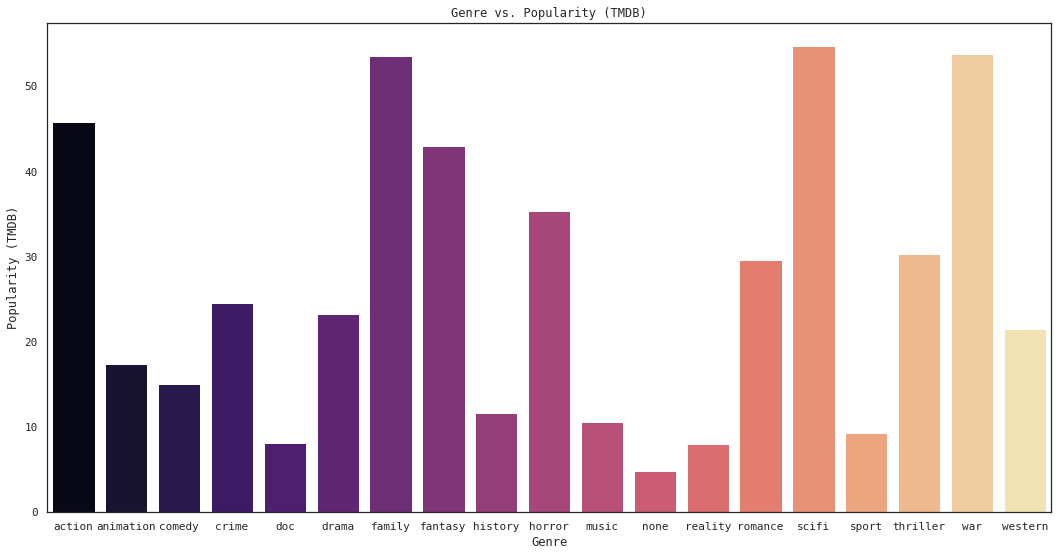

In [30]:
plt.figure(figsize=(18,9))
sns.barplot(x=genre_vs_score.index, y=genre_vs_score['tmdb_popularity'], palette=PALETTE).set(xlabel="Genre", ylabel="Popularity (TMDB)", title="Genre vs. Popularity (TMDB)")

To see which genre scored the highest on the performance metrics, we can sort the data and then redraw the bar graphs.

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'IMDb Rating'),
 Text(0.5, 1.0, 'Genre vs. Rating (IMDb)')]

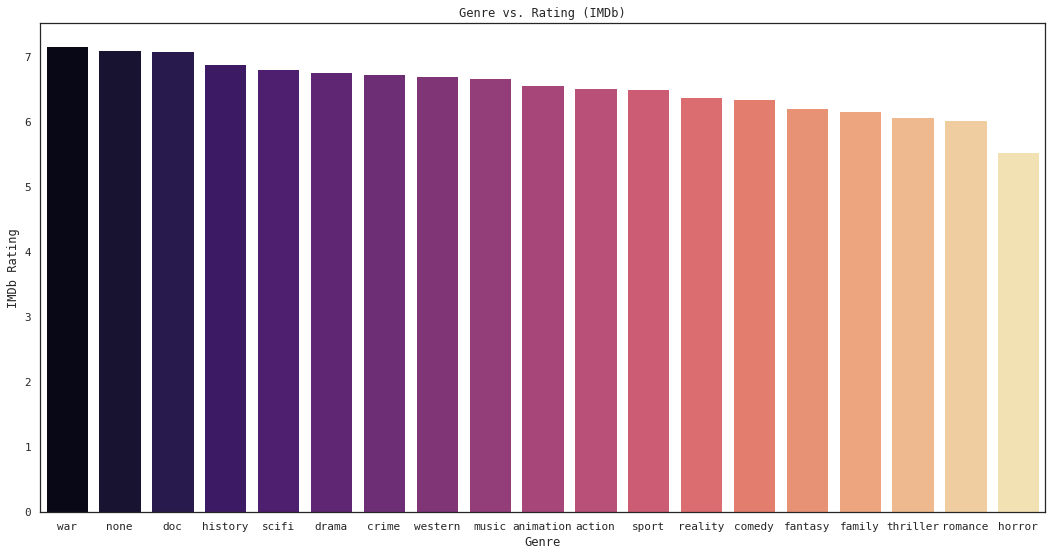

In [31]:
sorted_imdb = genre_vs_score.sort_values(by="imdb_score", ascending=False)
plt.figure(figsize=(18, 9))
sns.barplot(x=sorted_imdb.index, y=sorted_imdb['imdb_score'], palette=PALETTE).set(xlabel='Genre', ylabel='IMDb Rating', title='Genre vs. Rating (IMDb)')

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'TMDB Rating'),
 Text(0.5, 1.0, 'Genre vs. Rating (TMDB)')]

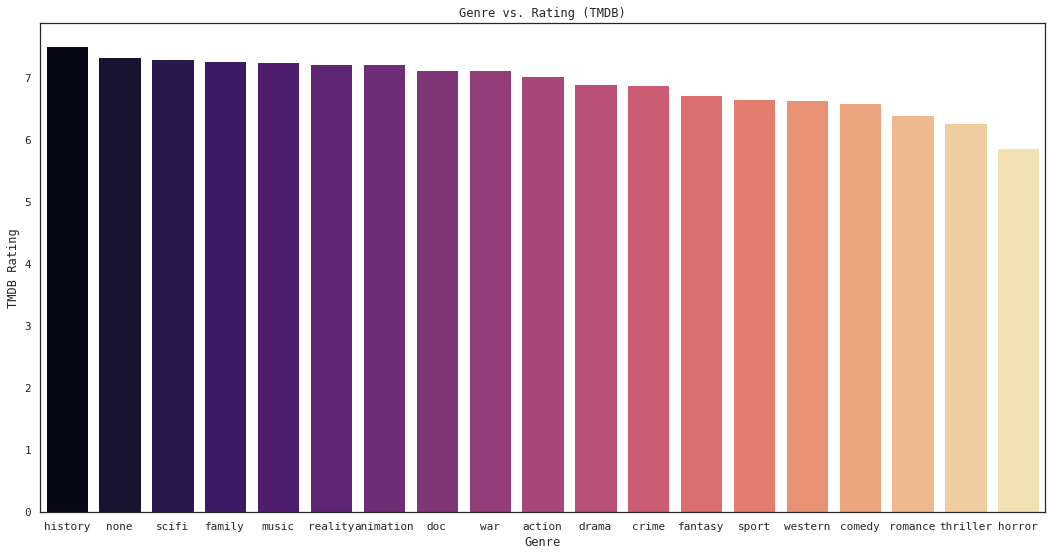

In [32]:
sorted_tmdb = genre_vs_score.sort_values(by="tmdb_score", ascending=False)
plt.figure(figsize=(18, 9))
sns.barplot(x=sorted_tmdb.index, y=sorted_tmdb['tmdb_score'], palette=PALETTE).set(xlabel='Genre', ylabel='TMDB Rating', title='Genre vs. Rating (TMDB)')

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'Popularity (TMDB)'),
 Text(0.5, 1.0, 'Genre vs. Popularity (TMDB)')]

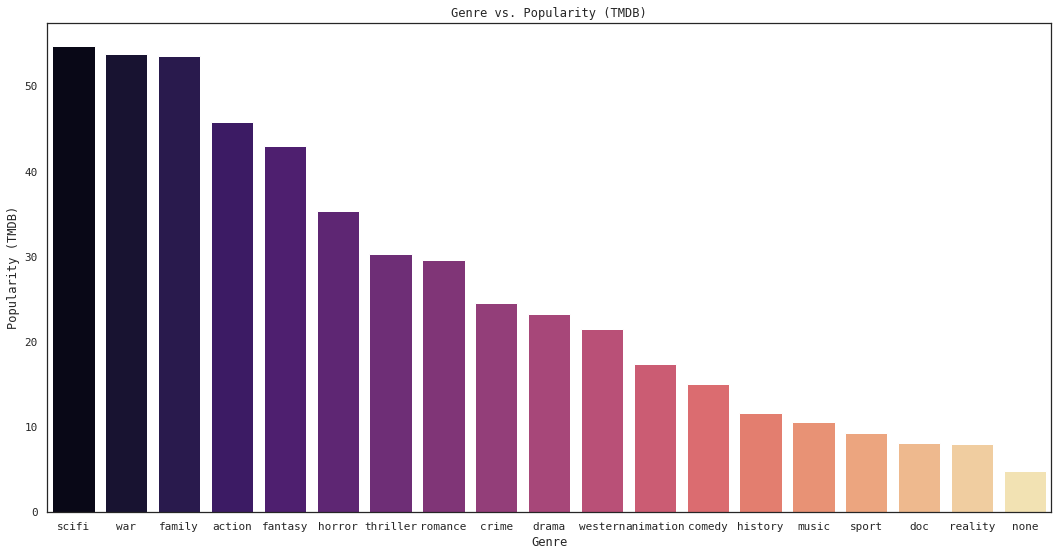

In [35]:
sorted_popularity = genre_vs_score.sort_values(by='tmdb_popularity', ascending=False)
plt.figure(figsize=(18,9))
sns.barplot(x=sorted_popularity.index, y=sorted_popularity['tmdb_popularity'], palette=PALETTE).set(xlabel='Genre', ylabel='Popularity (TMDB)', title='Genre vs. Popularity (TMDB)')



Within each scoring metric, the genres have relatively little variation. Yes, there are 1 or 2 point differences between the average genre and the highest-scoring one, but the data's variation is nontheless uniform.

However, there is an evident difference in the popularity of the genres and their scores. This is because a genre is rated based on other movies of that genre; rating a movie that is in scifi based on the quality of action movies is completely nonsensical. In other words, for people rating movies, popularity is not a significant metric; rather, the plot, characters, and acting are more decisive.


### Conclusion 
  
Genre **does not** necesarrily influence the rating a movie gets. The **popularity** of a particular movie or show, however, is affected by the genre.

### Additional Notes 

 - The visualizations presented in this section take into accout the trend between genre and rating for both movies and shows. In section 4.2, the shows will be analyzed in isolation. 

## Analysis of Shows 

The previous explorations conducted have been focused on the combined set of movies and shows. However, in this exploration, the aim is to thoroughly analyze the various nuances of the shows that are present in this database.

In [39]:
# Get all shows
df_shows = df[df['type'] == 'SHOW']
df_shows.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,is_movie,genres_transformed
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,0,doc
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3,0,comedy
29,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2144.0,1.490,7.0,0,comedy
47,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.9,302700.0,128.743,8.3,0,comedy
55,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['action', 'scifi', 'crime', 'drama']",['US'],4.0,tt0083437,6.9,33760.0,44.378,7.5,0,action


### Number of Seasons vs. Score 

<AxesSubplot:>

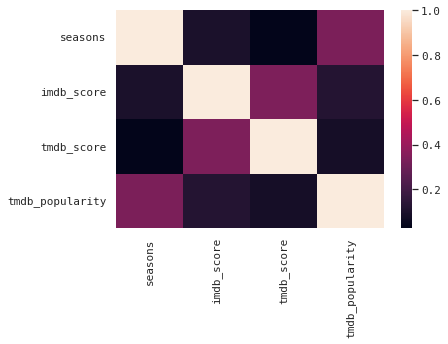

In [40]:
sns.heatmap(df_shows[['seasons', 'imdb_score', 'tmdb_score', 'tmdb_popularity']].corr())

This heatmap of the correlation tells us that there is very little correlation between `seasons` and either of the scoring metrics (`imdb_score`, `tmdb_score`). The relatively high correlation between `seasons` and `tmdb_popularity` aligns with what one might expect. After all, most people prefer shows with more seasons to shows with a lower number of seasons.

Let us plot out the relationships between `seasons` and any of the scoring metrics.

<AxesSubplot:xlabel='seasons', ylabel='imdb_score'>

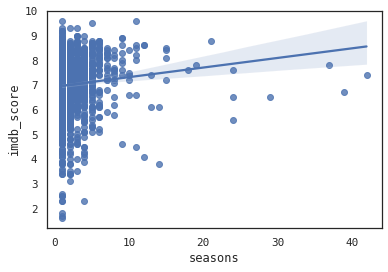

In [41]:
# Correlation between `seasons` and `imdb_score`
sns.regplot(x=df_shows['seasons'], y=df_shows['imdb_score'])

<AxesSubplot:xlabel='seasons', ylabel='tmdb_score'>

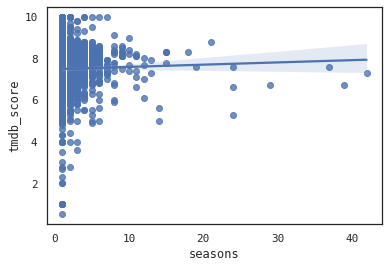

In [42]:
# Correlation between `seasons` and `tmdb_score`
sns.regplot(x=df_shows['seasons'], y=df_shows['tmdb_score'])

<AxesSubplot:xlabel='seasons', ylabel='tmdb_popularity'>

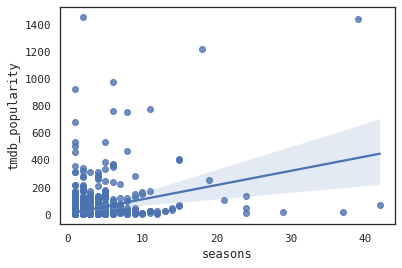

In [43]:
# Correlation between `seasons` and `tmdb_popularity`
sns.regplot(x=df_shows['seasons'], y=df_shows['tmdb_popularity'])

These regression plots confirm the conclusions drawn from the heatmap.

#### Conclusion 

The data suggest that an increased number of seasons corresponds to increased popularity. For the `imdb_score` values, an increased number of seasons corresponds to a slight increase in score. In contrast, the `tmdb_score` values show very little correlation between an increased number of seasons and the overall score. Extrapolating this, we can infer that the TMDB users take plot and other story-like features into consideration to a greater extent than do IMDb users.

#### TMDB Ratings for Shows vs. IMDb ratings for Shows 

Since the TMDB ratings and IMDb ratings are both recorded on a ten-point scale, we can compare them to see which site is more critical of movies.

In [44]:
tm_greater = len(df_shows[df_shows['tmdb_score'] > df_shows['imdb_score']])

print('# of TMDB ratings that greater than their respective IMDb ratings:', tm_greater)
print('# of IMDb ratings that greater than their respective TMDB ratings:', df_shows.shape[0] - tm_greater)

# of TMDB ratings that greater than their respective IMDb ratings: 1068
# of IMDb ratings that greater than their respective TMDB ratings: 979


This small difference indicates little to nothing about the metholody utilized by users of IMDb and TMDB to rate movies.

### Genres vs. Score 

In section 3, we observed some of the trends between genre and rating. Recall that, in section 3, we incorporated both movies and shows into our visualization of the data. However, the trends between genre and rating may differ for movies and shows.

In [45]:
genres_ratings_shows = df_shows.groupby("genres_transformed").aggregate({"imdb_score": "mean", "tmdb_score": "mean", "tmdb_popularity": "mean"})

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'Rating (IMDb)'),
 Text(0.5, 1.0, 'Genre vs. Rating (shows only)')]

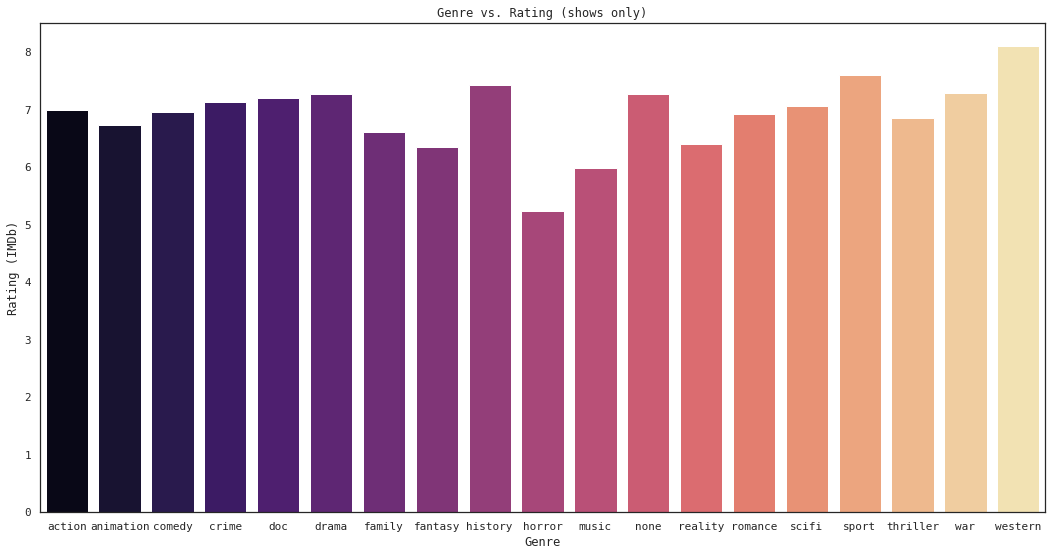

In [46]:
plt.figure(figsize=(18,9))
sns.barplot(x=genres_ratings_shows.index, y=genres_ratings_shows["imdb_score"], palette=PALETTE).set(xlabel="Genre", ylabel="Rating (IMDb)", title="Genre vs. Rating (shows only)")

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'Rating (TMDB)'),
 Text(0.5, 1.0, 'Genre vs. Rating (shows only)')]

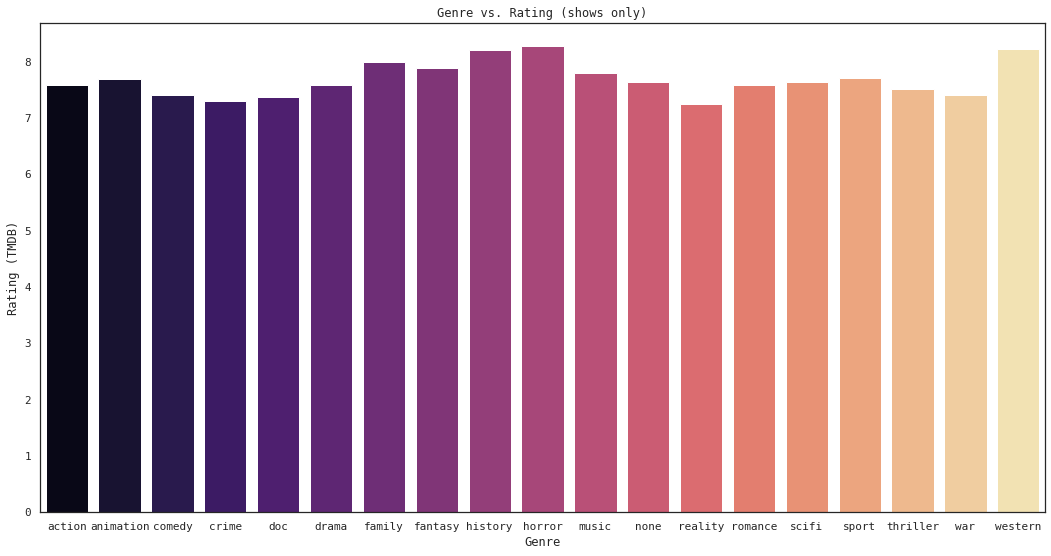

In [47]:
plt.figure(figsize=(18,9))
sns.barplot(x=genres_ratings_shows.index, y=genres_ratings_shows["tmdb_score"], palette=PALETTE).set(xlabel="Genre", ylabel="Rating (TMDB)", title="Genre vs. Rating (shows only)")

It might help if we arrange these in descending order to see the most highly rated genres for both IMDb and TMDB

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'Rating (IMDb)'),
 Text(0.5, 1.0, 'Genre vs IMDb Rating (shows only)')]

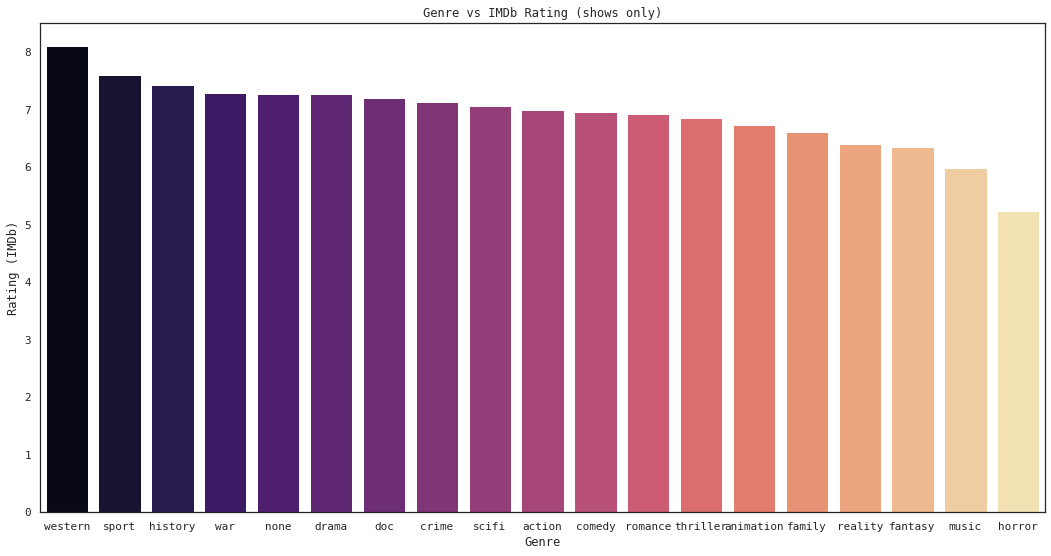

In [48]:
sorted_shows_imdb = genres_ratings_shows.sort_values(by='imdb_score', ascending=False)
plt.figure(figsize=(18,9))
sns.barplot(x=sorted_shows_imdb.index, y=sorted_shows_imdb['imdb_score'], palette=PALETTE).set(xlabel='Genre', ylabel='Rating (IMDb)', title='Genre vs IMDb Rating (shows only)')

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'Rating (TMDB)'),
 Text(0.5, 1.0, 'Genre vs TMDB Rating (shows only)')]

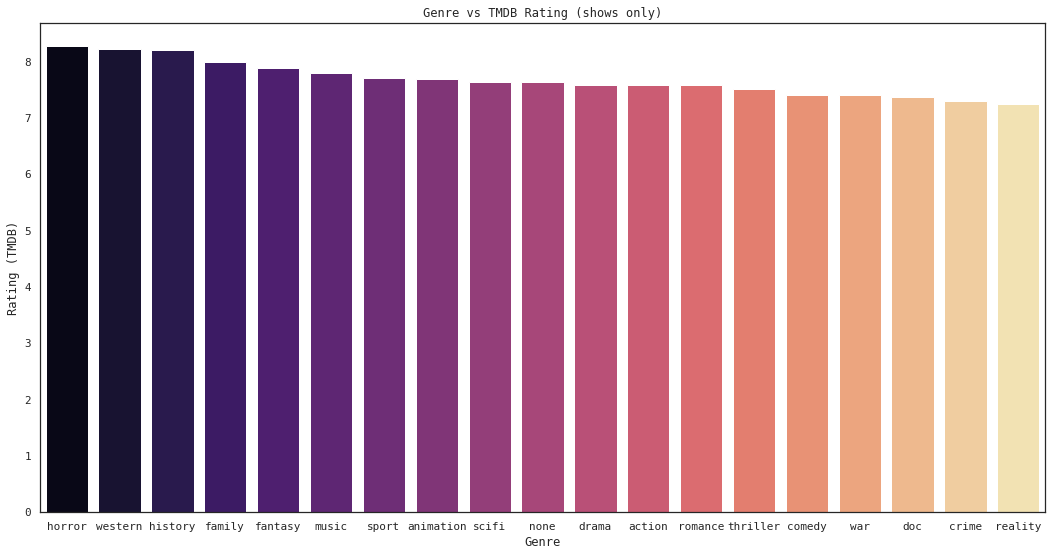

In [49]:
sorted_shows_tmdb = genres_ratings_shows.sort_values(by='tmdb_score', ascending=False)
plt.figure(figsize=(18, 9))
sns.barplot(x=sorted_shows_tmdb.index, y=sorted_shows_tmdb['tmdb_score'], palette=PALETTE).set(xlabel='Genre', ylabel='Rating (TMDB)', title='Genre vs TMDB Rating (shows only)')

Notice that the western genre and the history genre are both present in the top five highest scores for IMDb and TMDB.

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'Popularity (TMDB)'),
 Text(0.5, 1.0, 'Genre vs Popularity (shows only)')]

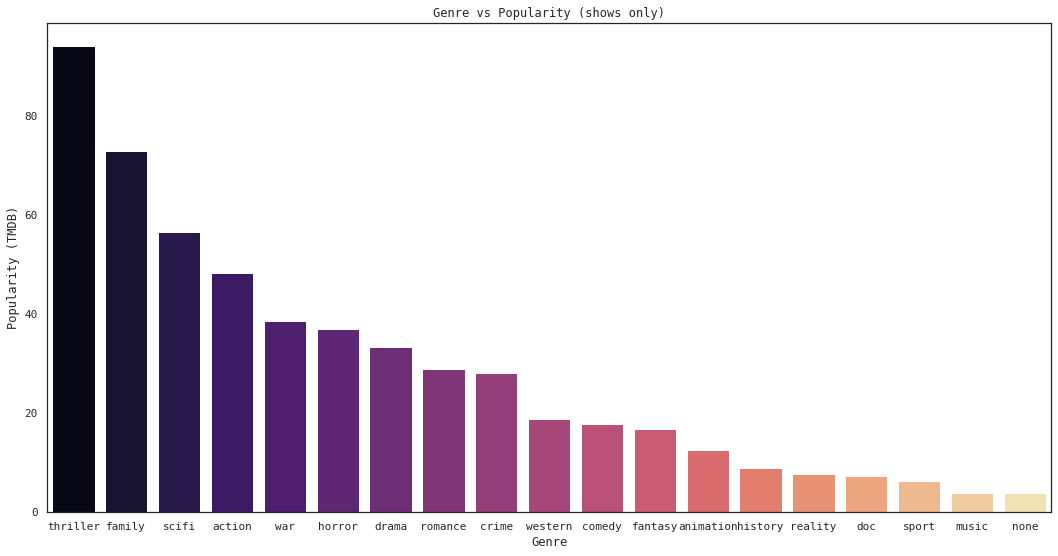

In [50]:
sorted_shows_pop = genres_ratings_shows.sort_values(by='tmdb_popularity', ascending=False)
plt.figure(figsize=(18, 9))
sns.barplot(x=sorted_shows_pop.index, y=sorted_shows_pop['tmdb_popularity'], palette=PALETTE).set(xlabel='Genre', ylabel='Popularity (TMDB)', title='Genre vs Popularity (shows only)')

#### Conclusion
Generally, the genre does not affect the rating a particular show receives. Moreover, it is hard to deduce a proper metric for scoring shows solely based on genre as other factors, such as plot, length, and acting, prove to be crucial to an average viewer's method for rating a particular show. Nonetheless, the distribution of average scores for genres is uniform and indicates that genre is not necessarily a primary metric for deducing the rating a show receives. This finding is expected as the people who rate shows of a particular genre compare that show to other shows of that same genre. This regularizes the methodology used by IMDb or TMDB users to judge genres, thus resulting in an overall negligible difference in rating.

However, there was a considerable difference in the popularity. Most people, it seems, enjoyed watching shows that belonged to the thiller, family, or science fiction genres. It is also important to note that these genres were not necessarily the highest scoring among the various genres. This indicates that the mean rating of shows of a particular genre does not dictate the genre's overall popularity.

## Production Country vs. Score

In [51]:
df_prod = df_cleaned.copy()
df_prod['production_countries'].head(10)

1     ['US']
2     ['GB']
3     ['GB']
4     ['US']
5     ['GB']
6     ['US']
7     ['US']
8     ['US']
9     ['US']
10    ['US']
Name: production_countries, dtype: object

It appears that the `production_countries` column takes on a structure similar to that of genres. This means that we will have to transform the column such that the production country can easily be identified.
As with the transformation of the `genres` column, the transformation of the `production_countries` will entail the selection of the first country present in each value of the column.

In [52]:
# transform the countries, selecting only the first country from each entry
def transform_countries(row):
    parsed = str(row)[1:-1].split(",")
    
    for i in range(len(parsed)):
        parsed[i] = parsed[i].strip()[1:-1]
        
    return parsed[0] if parsed[0] != '' else 'N/A'

df_prod['production_countries_transformed'] = df_prod['production_countries'].map(transform_countries)
df_prod['production_countries_transformed'].replace(to_replace='Lebanon', value='LB', inplace=True)

In [53]:
df_prod.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,is_movie,production_countries_transformed
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,1,US
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,1,GB
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8,1,GB
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,1,US
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3,0,GB


In [54]:
df_prod['production_countries_transformed'].value_counts()

US    1902
IN     561
GB     280
JP     246
KR     182
      ... 
PY       1
ZW       1
HR       1
GL       1
KE       1
Name: production_countries_transformed, Length: 90, dtype: int64

Before we begin analyzing the relationship between the production countries and the performance of those countries on each of the scoring metrics, let us observe the distribution of production countries. 

To do this, I will split up the data into two sections for the sake of visualization. Viewing all ninety-one distinct values in one bar plot/histogram ended up being quite messy.

[Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of Production Countries (Section 1)')]

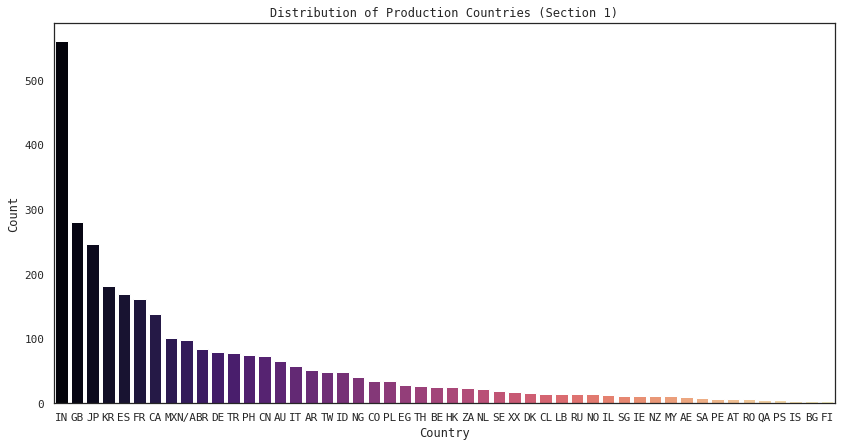

In [55]:
# First Section
# The U.S. is the leading producer of shows by a mile, so it is excluded to put the data on more of an equal footing
plt.figure(figsize=(14, 7))
sns.barplot(x=df_prod['production_countries_transformed'].value_counts()[1:51].index, y=df_prod['production_countries_transformed'].value_counts()[1:51], palette=PALETTE).set(xlabel="Country", ylabel="Count", title='Distribution of Production Countries (Section 1)')

[Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of Productions Countries (Section 2)')]

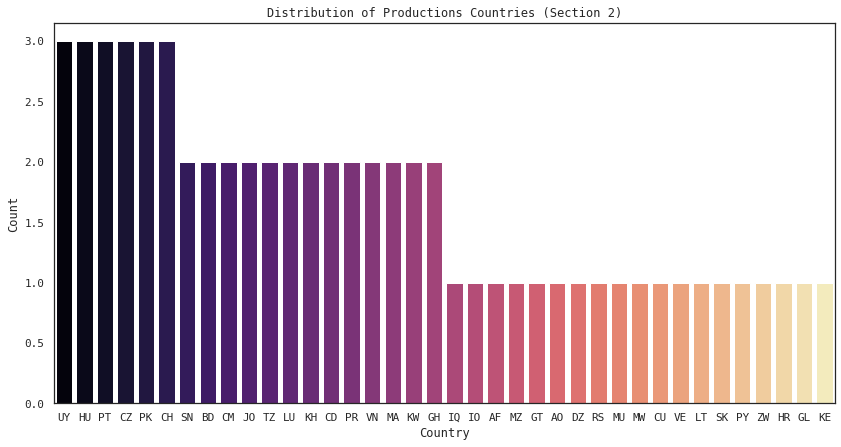

In [56]:
# Second Section
plt.figure(figsize=(14, 7))
sns.barplot(x=df_prod['production_countries_transformed'].value_counts()[52:91].index, y=df_prod['production_countries_transformed'].value_counts()[52:91], palette=PALETTE).set(xlabel='Country', ylabel='Count', title='Distribution of Productions Countries (Section 2)')

The top four countries are those that we might expect to be the leading producers of movies/shows; Namely, the countries are the U.S., India, Great Britain, and Japan. The distribution of the first section is extremely skewed, as the top five or six countries have an overwhelming lead in terms of the number of movies/shows produced. The second section, howeover, shows a somewhat uniform distribution; granted, the `count` values of the countries in the second section do differ by only one production.

In [57]:
# Group the data by production country
df_prod_grouped = df_prod.groupby('production_countries_transformed').aggregate({"imdb_score": "mean", "tmdb_score": "mean", "tmdb_popularity": "mean"})
df_prod_grouped.head()

,imdb_score,tmdb_score,tmdb_popularity
production_countries_transformed,,,
AE,5.510000,5.580000,4.070200
AF,7.700000,6.500000,4.250000
AO,3.900000,5.600000,9.692000
AR,6.415385,6.905769,17.022481
AT,5.614286,5.900000,5.388714


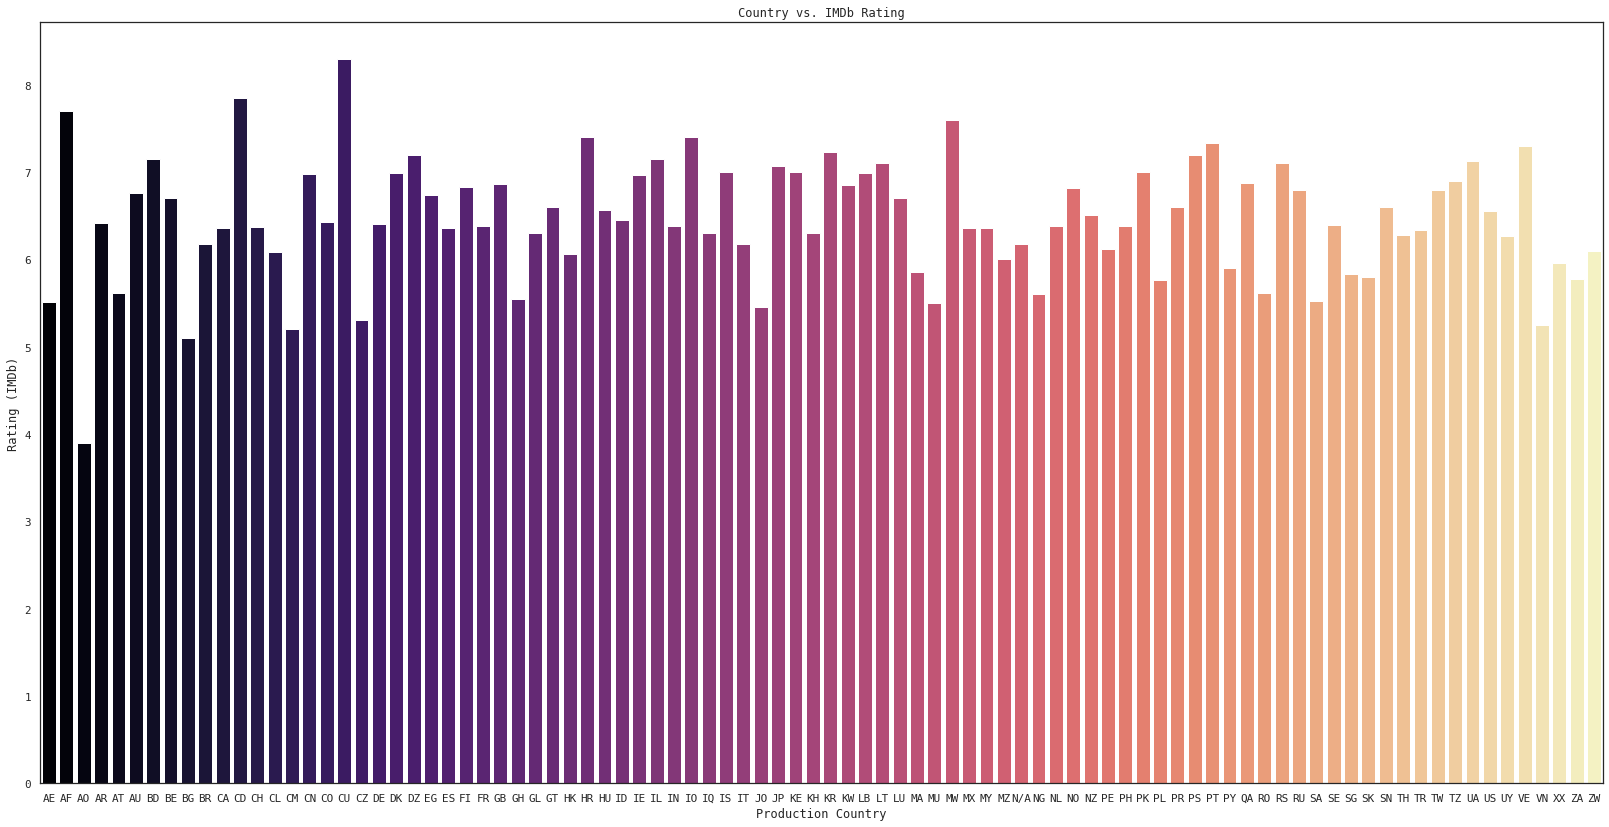

[Text(0.5, 0, 'Production Country'),
 Text(0, 0.5, 'Rating (IMDb)'),
 Text(0.5, 1.0, 'Country vs. IMDb Rating (sorted)')]

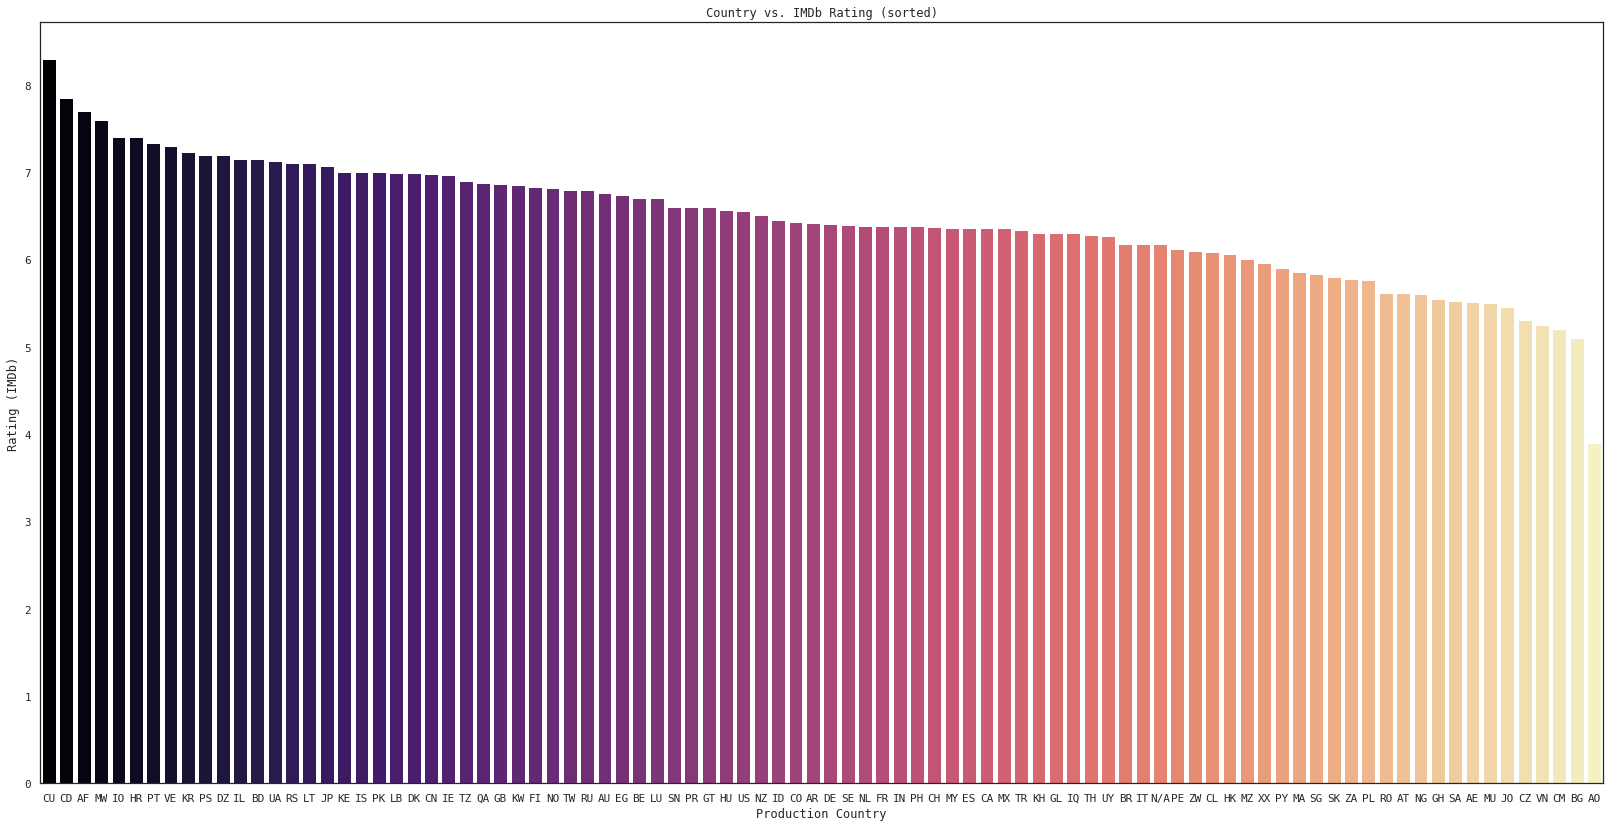

In [58]:
# Visualize IMDb Ratings
plt.figure(figsize=(28,14))
sns.barplot(x=df_prod_grouped.index, y=df_prod_grouped['imdb_score'], palette=PALETTE).set(xlabel="Production Country", ylabel='Rating (IMDb)', title='Country vs. IMDb Rating')
plt.show()
plt.figure(figsize=(28,14))
sns.barplot(x=df_prod_grouped.sort_values(by="imdb_score", ascending=False).index, y=df_prod_grouped.sort_values(by='imdb_score', ascending=False)['imdb_score'], palette=PALETTE).set(xlabel="Production Country", ylabel='Rating (IMDb)', title='Country vs. IMDb Rating (sorted)')

Well those are certainly some strange results! Cuba, The Democratic Republic of the Congo, and Afghanistan were the top three scorers. The reason for this high score (and the reason for the relatively low scores of the U.S., Great Britain, and India) is due to the amount of movies/shows present for each country. More data inevitably results in more variation; high scorers such as Cuba had a small number of shows present in the database. To see a perhaps more accurate picture, countries with a low amount of shows produced in them must be filtered out.

In [59]:
# filter out countries with less than 20 shows produced
accepted_countries = df_prod['production_countries_transformed'].value_counts()[df_prod['production_countries_transformed'].value_counts() > 20].index.values

df_prod_accepted = df_prod[df_prod['production_countries_transformed'].isin(accepted_countries)].groupby("production_countries_transformed").aggregate({"imdb_score": "mean", "tmdb_score": "mean", "tmdb_popularity": "mean"})

In [60]:
df_prod_accepted.head(10)

,imdb_score,tmdb_score,tmdb_popularity
production_countries_transformed,,,
AR,6.415385,6.905769,17.022481
AU,6.762121,7.045455,13.855030
BE,6.700000,6.953846,14.028500
BR,6.176190,7.071429,12.074917
CA,6.353957,6.721583,24.262144
CN,6.973973,7.546575,20.756630
CO,6.429412,7.120588,105.480147
DE,6.406329,6.578481,25.535823
EG,6.741379,6.513793,3.260172


### IMDb Ratings

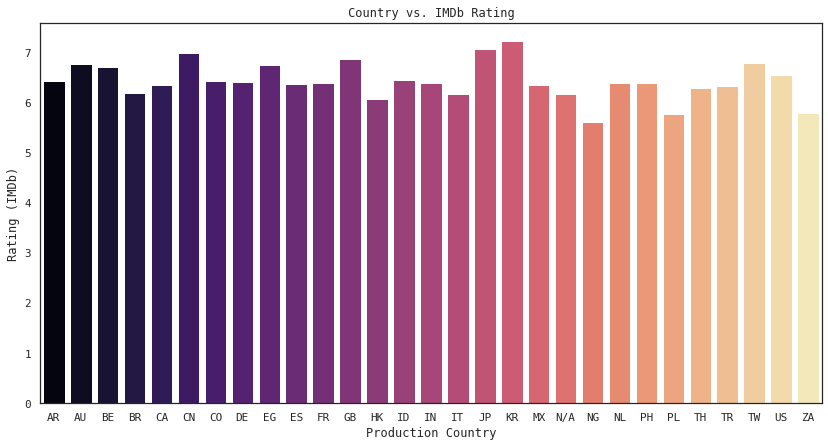

[Text(0.5, 0, 'Production Country'),
 Text(0, 0.5, 'Rating (IMDb)'),
 Text(0.5, 1.0, 'Country vs. IMDb Rating (sorted)')]

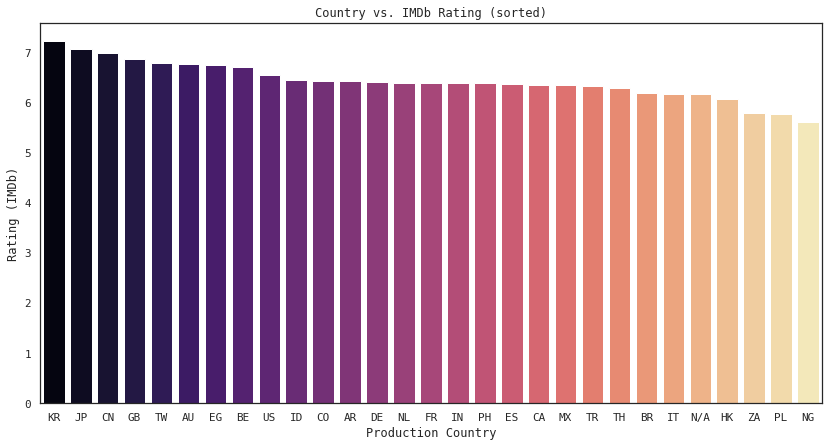

In [61]:
# Replot the data
# Visualize IMDb Ratings
plt.figure(figsize=(14,7))
sns.barplot(x=df_prod_accepted.index, y=df_prod_accepted['imdb_score'], palette=PALETTE).set(xlabel="Production Country", ylabel='Rating (IMDb)', title='Country vs. IMDb Rating')
plt.show()
plt.figure(figsize=(14,7))
sns.barplot(x=df_prod_accepted.sort_values(by="imdb_score", ascending=False).index, y=df_prod_accepted.sort_values(by='imdb_score', ascending=False)['imdb_score'], palette=PALETTE).set(xlabel="Production Country", ylabel='Rating (IMDb)', title='Country vs. IMDb Rating (sorted)')

These new-and-improved plots showcase an increased score for movies/shows of prominent Asian countries.

Next, we will examine the TMDB ratings as well as the TMDB popularity

### TMDB Ratings

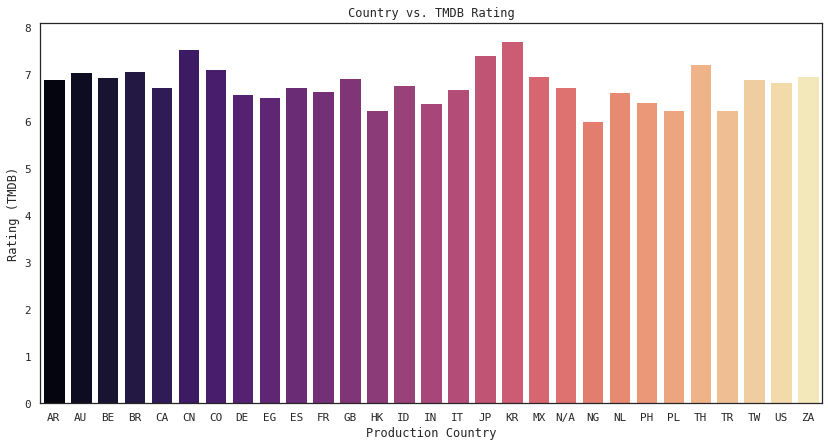

[Text(0.5, 0, 'Production Country'),
 Text(0, 0.5, 'Rating (TMDB)'),
 Text(0.5, 1.0, 'Country vs. TMDB Rating (sorted)')]

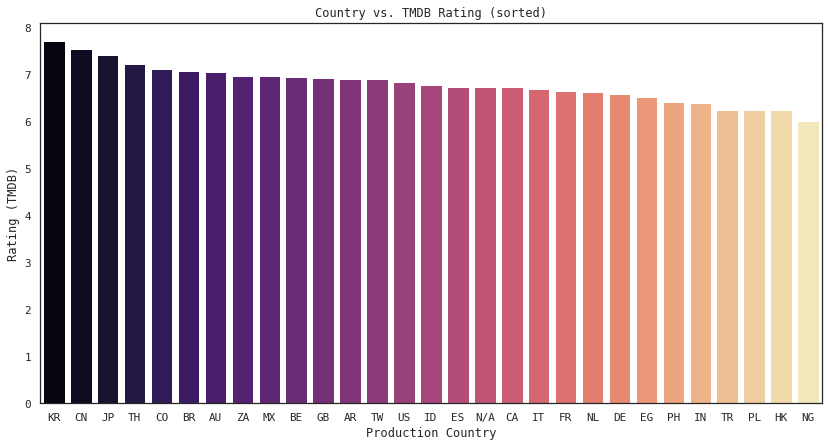

In [62]:
# Visualize TMDB Ratings
plt.figure(figsize=(14,7))
sns.barplot(x=df_prod_accepted.index, y=df_prod_accepted['tmdb_score'], palette=PALETTE).set(xlabel="Production Country", ylabel='Rating (TMDB)', title='Country vs. TMDB Rating')
plt.show()
plt.figure(figsize=(14,7))
sns.barplot(x=df_prod_accepted.sort_values(by="tmdb_score", ascending=False).index, y=df_prod_accepted.sort_values(by='tmdb_score', ascending=False)['tmdb_score'], palette=PALETTE).set(xlabel="Production Country", ylabel='Rating (TMDB)', title='Country vs. TMDB Rating (sorted)')

### TMDB Popularity 

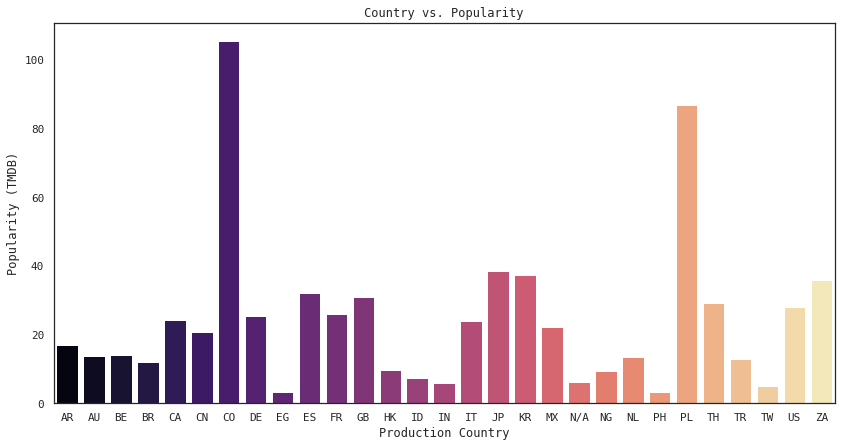

[Text(0.5, 0, 'Production Country'),
 Text(0, 0.5, 'Popularity (TMDB)'),
 Text(0.5, 1.0, 'Country vs. Popularity (sorted)')]

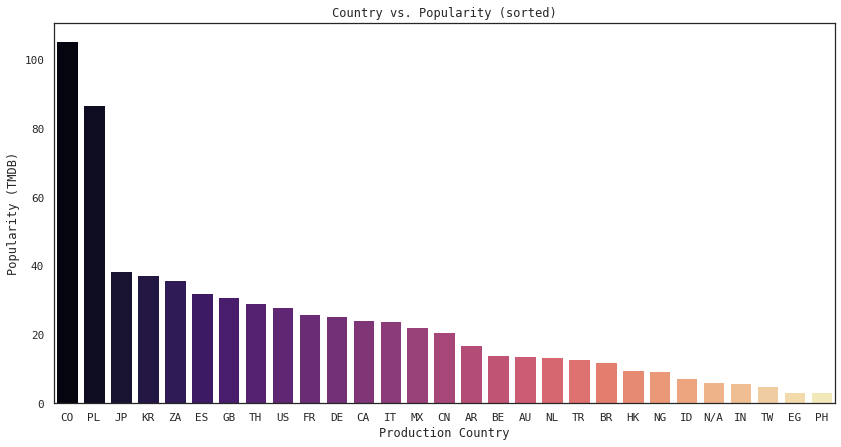

In [63]:
# Visualize TMDB Popularity
plt.figure(figsize=(14,7))
sns.barplot(x=df_prod_accepted.index, y=df_prod_accepted['tmdb_popularity'], palette=PALETTE).set(xlabel="Production Country", ylabel='Popularity (TMDB)', title='Country vs. Popularity')
plt.show()
plt.figure(figsize=(14,7))
sns.barplot(x=df_prod_accepted.sort_values(by="tmdb_popularity", ascending=False).index, y=df_prod_accepted.sort_values(by='tmdb_popularity', ascending=False)['tmdb_popularity'], palette=PALETTE).set(xlabel="Production Country", ylabel='Popularity (TMDB)', title='Country vs. Popularity (sorted)')

Another surprising batch of results: Colombia and Poland were the two most popular countries of production, and, as expected, Japan and Korea both showed up in the top five. The popularity of Colobmia and Poland is due to the cost of producing in those countries. Presumably, Colombia and Poland have relatively low costs for producing movies or shows.

The act of traveling to other countries to shoot a movie or a show is not new. For example, in India, some advertising agencies traveled to Malaysia or to South Africa to shoot their ads for sole reason of production cost.

### Conclusion
From this mini-exploration, we found out some surprising findings regarding the favorite production countries for each of the movies in this database. Specifically, we discovered that Colombia and Poland have a surprisingly large popularity on TMDB. Additionally, our exploration into the patterns between production country and rating aligned with what we might expect: movies/shows from Japan, Korea, and China (primarily akin to anime) were rated highly and were quite popular. 

# Modeling!

Now that we have done all this data exploration, it is time to effectively put it to good use. In this section, we will utilize our knowledge of the trends in this dataset to predict the popularity that a particular movie or show might receive on TMDB.

## Data Cleaning 

In [37]:
df_model = df_cleaned.copy()

In [38]:
# Drop unnecessary column(s)
df_model.drop("id", inplace=True, axis=1)

# Create a decade feature
df_model['decade'] = df_model['release_year'].map(get_decade)
df_model.head()

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,decade
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,1970
2,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,1970
3,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8,1970
4,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,1970
5,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3,1960


In [39]:
# Drop another unnecessary column
df_model.drop("imdb_id", inplace=True, axis=1)

In [40]:
# Clean `genres` and `production_countries` columns, again taking the first element of the list that each value holds
def parse_list(row):
    parsed = str(row)[1:-1].split(",")
    for i in range(len(parsed)):
        parsed[i] = parsed[i].strip()[1:-1]
        
    return parsed[0] if parsed[0] != '' else 'N/A'

df_model['genres_parsed'] = df_model['genres'].map(parse_list)
df_model['prod_countries_parsed'] = df_model['production_countries'].map(parse_list)
df_model[['genres_parsed', 'prod_countries_parsed']]

,genres_parsed,prod_countries_parsed
1,crime,US
2,comedy,GB
3,comedy,GB
4,horror,US
5,comedy,GB
...,...,...
5792,comedy,EG
5795,comedy,ID
5796,reality,US
5798,drama,IN


In [41]:
# Add an `is_movie` column
df_model['is_movie'] = df_model.type.map(lambda x: 0 if x == 'SHOW' else 1)

### Null Values

In [42]:
# Get all null values
df_model.isnull().sum()

title                       0
type                        0
description                 2
release_year                0
age_certification        2146
runtime                     0
genres                      0
production_countries        0
seasons                  3269
imdb_score                  0
imdb_votes                 14
tmdb_popularity             0
tmdb_score                  0
decade                      0
genres_parsed               0
prod_countries_parsed       0
is_movie                    0
dtype: int64

In [43]:
# Drop unnecessary columns
df_model.drop("title", axis=1, inplace=True)
df_model.drop("description", axis=1, inplace=True)

In [44]:
# Impute null values
df_model['age_certification'].fillna("N/A", inplace=True)
df_model['seasons'].fillna(0.0, inplace=True)
df_model['imdb_votes'].fillna(df_model['imdb_votes'].mean(), inplace=True)

In [45]:
# Confirm that all null values have been successfully imputed
df_model.isnull().sum()

type                     0
release_year             0
age_certification        0
runtime                  0
genres                   0
production_countries     0
seasons                  0
imdb_score               0
imdb_votes               0
tmdb_popularity          0
tmdb_score               0
decade                   0
genres_parsed            0
prod_countries_parsed    0
is_movie                 0
dtype: int64

### Encoding Categoricals 

In [20]:
# Transform all categorical data into numberical data
all_data = pd.get_dummies(df_model[['decade', 'age_certification', 'genres_parsed', 'prod_countries_parsed', 'imdb_votes', 'seasons', 'is_movie']])

## Model Training 

I will experiment with five different models. 

Details regarding the model training process:
 - The primary metrics used will be mean absolute percentage error (MAPE), mean absolute error (MAE), and mean squared error (MSE).
 - For cross-validation, MAPE will be used
 - For the test set, all three will be displayed
 
The five models and their performances on the test set are shown below:
 - Random Forest (1.27% MAPE, 15.63 MAE, 1793.48 MSE)
 - Linear Regression (3.38% MAPE, 21.62 MAE, 1555.31 MSE)  
 - SVR (1.02% MAPE, 14.95 MAE, 1626.35 MSE)  
 - XGB (1.41% MAPE, 16.71 MAE, 2240.38 MSE)  
 - Neural Network (**0.65% MAPE, 12.96 MAE, 1467.08 MSE**)  

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score

X = all_data.copy()
y = df_model.pop('tmdb_popularity')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [26]:
rf = RandomForestRegressor(n_estimators=1000, random_state=0)

scores = -1 * cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
print(scores)
print(scores.mean())

[1.66543812 1.22800226 1.4912566  1.36196836 1.50278903]
1.4498908727552764


In [27]:
linreg = LinearRegression()

scores = -1 * cross_val_score(linreg, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
print(scores)
print(scores.mean())

[3.73612932 2.97929456 3.40781148 3.23403511 3.72867204]
3.4171885025089743


In [28]:
svr = SVR(kernel='poly', degree=1, C=1)

scores = -1 * cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
print(scores)
print(scores.mean())

[1.05947789 0.9678749  0.96714982 0.99174927 1.05291168]
1.0078327108536569


In [29]:
xgb = XGBRegressor(n_estimators=50)

scores = -1 * cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
print(scores)
print(scores.mean())

[2.01269798 1.48029811 1.7249213  1.52235951 1.74642182]
1.6973397444617835


In [83]:
models = [rf, linreg, svr, xgb]

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

model = keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=[len(X_train.columns)]),
    layers.Dense(512, activation='elu'),
    layers.Dense(256, activation='elu'),
    layers.Dense(128, activation='elu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')
model.fit(X_train, y_train, batch_size=128, epochs=800, verbose=0)
preds = model.predict(X_test)
print({"mean_squared_error": mean_squared_error(y_test, preds), "mean_absolute_error": mean_absolute_error(y_test, preds), "mean_absolute_percentage_error": mean_absolute_percentage_error(y_test, preds)})

48/48 [==============================] - 0s 3ms/step
{'mean_squared_error': 1467.083824929312, 'mean_absolute_error': 12.964457348922549, 'mean_absolute_percentage_error': 0.6542073373480247}


In [30]:
def score_dataset(X_train, X_valid, y_train, y_valid, model=RandomForestRegressor(n_estimators=1000, random_state=0)):
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return {"mean_squared_error": mean_squared_error(y_valid, preds), "mean_absolute_error": mean_absolute_error(y_valid, preds), "mean_absolute_percentage_error": mean_absolute_percentage_error(y_test, preds)}

In [31]:
score_dataset(X_train, X_test, y_train, y_test, model=rf)

{'mean_squared_error': 1793.482355295732,
 'mean_absolute_error': 15.633104289076185,
 'mean_absolute_percentage_error': 1.2727060945174824}

In [33]:
score_dataset(X_train, X_test, y_train, y_test, model=linreg)

{'mean_squared_error': 1555.3175091160745,
 'mean_absolute_error': 21.62287987518783,
 'mean_absolute_percentage_error': 3.3806918985017407}

In [34]:
score_dataset(X_train, X_test, y_train, y_test, model=svr)

{'mean_squared_error': 1626.3516890257904,
 'mean_absolute_error': 14.955967201171001,
 'mean_absolute_percentage_error': 1.017564962166441}

In [35]:
score_dataset(X_train, X_test, y_train, y_test, model=xgb)

{'mean_squared_error': 2240.382051720415,
 'mean_absolute_error': 16.707015393819226,
 'mean_absolute_percentage_error': 1.405120728593794}

# Ending Remarks

If you made it this far, congratulations! This is one of my first notebooks so please leave any suggestions/insights if you have any. As mentioned before, it is encouraged that you look into this data as well. Lastly, thank you for reading!